## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# import csv file and show first 5 rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# total number of rows in dataset
rows = df.shape[0]
rows

294478

In [4]:
print('There are ' + str(rows) + ' rows in the dataset')

There are 294478 rows in the dataset


c. The number of unique users in the dataset.

In [5]:
# total unique users in dataset
users = df['user_id'].nunique()
users

290584

In [6]:
print('There are ' + str(users) + ' unique users in this dataset')

There are 290584 unique users in this dataset


d. The proportion of users converted.

In [7]:
# proportion of unique users who converted
converted = df.query('converted == 1')['user_id'].nunique()/users
converted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
# number of mismatches between new_page and treatment entries
mismatch1 = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]
mismatch2 = df[(df['group'] == 'control') & (df['landing_page'] != 'old_page')]
mismatch1['user_id'].count() + mismatch2['user_id'].count()

3893

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no missing values in any rows in the dataset.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# filtering df for conditions of matching treatment/new page and control/old page
df_treatment = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
df_control = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]

In [11]:
# concatenating the two dataframes created from filtering
df2 = pd.concat([df_treatment, df_control])
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
# unique number of users in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# proof of only one duplicate in df2
df2.shape[0]-df2['user_id'].nunique()

1

In [15]:
#displaying duplicated row in df2
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
#row info of duplicate
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#dropping duplicate row
df2 = df2.drop_duplicates(subset = 'user_id')

#confirming the number of rows after dropping duplicate, matches the unique number of unique rows found previously
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#P(converting)

df2[df2['converted'] == 1].shape[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#filter for control group, find probability that conversion = 1
control_conv = df2[df2['group'] == 'control']['converted'].mean()
control_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#filter for treatment group, find probability that conversion = 1
treatment_conv = df2[df2['group'] == 'treatment']['converted'].mean()
treatment_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
df2[df2['landing_page'] == 'new_page'].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

***At this point there is insufficient evidence to conclude the new treatment leads to more conversions. This is because the probability of conversion given that an individual is in the treatment group is lower than the probability of conversion given that an individual is in the control group.***

***Further testing would be necessary to determine the conclusion, particularly because the proportions of conversions for the two groups are quite close in value. It would be impractical to make such a big decision from one test, without factoring in the potential effects of other variables such as price of conversion, customer age, location etc.***

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_0: p_{new} - p_{old} \leq 0$$**

**$$H_1:p_{new} - p_{old} \gt 0$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
#conversion rate for p_new assumes overall conversion rate in ab_data
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
#p_old = p_new
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
#total number of rows listed as 'treatment'
n_new = df2[df2['group'] == 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
#total number of rows listed as 'control'
n_old = df2[df2['group'] == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#using coin flips approach simulate n_new transactions with conversion rate of p_new
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
#using coin flips approach simulate n_old transactions with conversion rate of p_old
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
#subtracting old from new to find the difference
p_dif = new_page_converted.mean() - old_page_converted.mean()
p_dif

-0.0014680698761016242

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
#10000 values generated for the coin flips approach simulation above
p_diffs = []
for _ in range(10000):
    new = np.random.binomial(1,p_new,n_new)
    old = np.random.binomial(1,p_old,n_old)
    p_diffs.append(new.mean() - old.mean())

In [30]:
#converting to numpy array
p_diffs = np.array(p_diffs)
p_diffs

array([  1.82180551e-03,   7.13623105e-04,   4.10513524e-04, ...,
         4.61137300e-05,  -6.76533919e-04,  -1.47514613e-03])

In [31]:
#confirmnig there are 10000 values in p_diffs
len(p_diffs)

10000

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [32]:
#calculating the observed difference between control and treatment conversion
obs_diff = treatment_conv - control_conv
obs_diff

-0.0015782389853555567

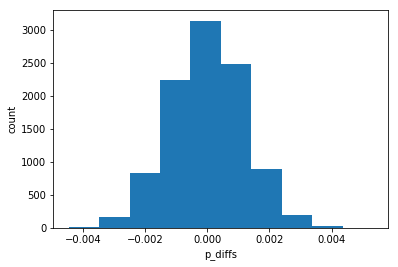

In [34]:
#plotting p_diffs histogram
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('count');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
#finding standard deviation of p_diffs
p_diffs_std = p_diffs.std()
p_diffs_std

0.0012042997773691474

In [38]:
#setting up null_vals to plot histogram to calculate the p-value
null_vals = np.random.normal(p_diffs.mean(), p_diffs_std, p_diffs.size)
null_vals.mean()

-6.0746965434112839e-06

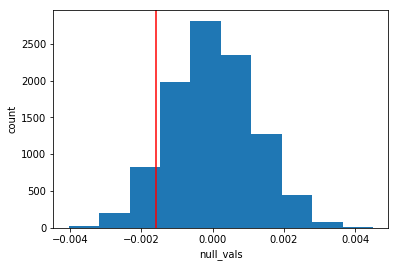

In [64]:
#plotting histogram and p-value line for null_vals
plt.hist(null_vals)
plt.axvline(obs_diff, color='red')
plt.ylabel('count')
plt.xlabel('null_vals');

In [41]:
#p-value calculation
(null_vals > obs_diff).mean()

0.90790000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

***The value computed in part j. is showing the p-value of the random sampling simulated using the data in ab_test.csv. This is used to determine whether we reject, or fail to reject, the null hypothesis. In this case the p-value is around 0.9, which is quite high. This is computed by finding the area in the null_vals histogram, to the right of the observed red vertical line.***

***Incorporating our initial null and alternative hypotheses, with a type I error rate, $\alpha$ of 5% (0.05), this p-value far exceeds the $\alpha$. Therefore we can conclude that we fail to reject the null hypothesis. That is, our simulation gives us strong reason to stick with current web page instead of moving to the new one, based on this test alone.***


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [42]:
import statsmodels.api as sm

convert_old = df2[(df2['group'] == 'control') & (df2['converted'] == 1)]['converted'].shape[0]
convert_new = df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)]['converted'].shape[0]
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [44]:
#setting up count and nobs values to compute p-value
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])

#z-score and p-value
stat, pval = sm.stats.proportions_ztest(count, nobs, alternative='larger')
stat, pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

***The z-score tells us that mean value of old and new conversions, lies 1.3 standard deviations below the mean of the sample. This shows that the data lies within ~82% of the sampling distibution (ref: https://www.mathsisfun.com/data/standard-normal-distribution-table.html).***

*Furthermore the p-value found using the built in closely matches the p-value of my findings in part j. Using the built-in, the p-value was found to be 0.905, whereas through plotting the dstribution, the p-value was found to be 0.906. This is further proof that the distribution provides evidence that we should fail to reject the null hypothesis, as there is a ~91% chance that we will observe our statistic given that the null is true.*

*With the high p-value, this would point to the idea that, it is not the website that has the main significance in determining whether customers make the conversion. It may be that other factors are involved. Therefore it would not be practical to only look at the website as the variable factor, as other factors may affect customer decision to convert, including marketing campaigns, market sentiment, price of the conversion and customer location to name a few.*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

***Use logistic regression in this case as it is used to predict only two outcomes, whereas multiple linear regression is used to predict varying outcomes.***

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
#recalling df2
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [46]:
#creating dummy variables for treatment and control, setting the value 1 for treatment
dummies = pd.get_dummies(df2['group'])['treatment']
df2 = df2.join(dummies)
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1


In [47]:
#renaming the treatment column ab_page
df2.rename(columns={'treatment':'ab_page'}, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1


In [48]:
#adding intercept column
df2['intercept'] = 1

In [49]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [50]:
#using statsmodels to instantiate logistic regression model
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:               8.077e-06
Time:                        20:40:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [52]:
#interpreting the results
1/np.exp(-0.0150)

1.0151130646157189

As the baseline of the logistic regression model is set to the 'control' dummy variable, the comparison of ab_page coef is to the control baseline. Therefore, if an individual receives the **control** page over the treatment (ab_page) page, they are **1.02** times ***more*** likely to convert than if they received the treatment page, holding all other variables constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

***The p-value associated with the ab_page is 0.19.***

*Comparing to Part II, the p-value here was around 0.9. This is a large difference because of the way the null and alternative hypothesis tests are set out.*

*In Part II the null and altertive was set up to state that the old page has a better success rate at conversion than the new page, unless proven otherwise. This created a one-sided test where the p-value was concerned with whether the statistical significance that the new page was better than the old page.*

*However in Part III the logistic regression sets up the null and alternative hypothesis to look at the probability of the new page resulting in conversion or not. Logistic regression models are usually two sided tests.*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

***It is a good idea to consider other factors, firstly because the p-value shows the low statistical significance that the new page has on conversion.***

*However it is also important to consider other factors, such as lifestyle, age, geography and whether there is more to making the conversion decision than initially thought. Looking further into this, product promotions and effective marketing campaigns may have a more significant impact than a new website alone.*

*It is good to consider these as this may show evidence of the varibles with highest statistical significance on the outcome, allowing to identify the most important variables in the decision making process.*

*The disadvantages however are that it would be better not to use variables that are not related to the dependent, as well as minimising variables that are highly correlated to each other. ALso, if variables have non-linear relationships with the dependent, this will be difficult for the logistic regression to process.*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [53]:
#import countries.csv and show first 5 rows
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [54]:
#join df2 and countries, on user_id
df3 = df2.set_index('user_id').join(countries.set_index('user_id'))
df3.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country
user_id,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [55]:
#testing that the join worked correctly, confirming the row in df2, for user_id 661590
test = df2[df2['user_id'] == 661590]
test

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


In [56]:
#testing that the join worked correctly, confirming the row in countries, for user_id 661590
test1 = countries[countries['user_id'] == 661590]
test1

,user_id,country
249365,661590,US


In [57]:
#check to confirm no missing values for countries in df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 661590 to 697314
Data columns (total 7 columns):
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
ab_page         290584 non-null uint8
intercept       290584 non-null int64
country         290584 non-null object
dtypes: int64(2), object(4), uint8(1)
memory usage: 25.8+ MB


In [58]:
#confirming the total unique country values in df3
df3['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [59]:
#plotting the logistic regression for countries with conversion
df3['intercept'] = 1

#creating dummy variables for countries
dummies2 = pd.get_dummies(df3['country'])
df3 = df3.join(dummies2)
df3.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
user_id,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [60]:
#using statsmodels to instantiate logistic regression model
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept','US', 'UK']])
results2 = logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:               1.521e-05
Time:                        20:42:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [61]:
#interpreting the model for the coef of CA and UK
np.exp(0.0408), np.exp(0.0507)

(1.0416437559600236, 1.0520072437650141)

*From the logistic regression model for the countries, the first conclusion is that the **statistical significance** of using countries was mixed, given that Canada had a p-value of 0.129 and UK had a p-value of 0.456. With this in mind, it can be argued that the statistical significance of customers in Canada (0.129) is greater than the significance of the new website (0.190), whereas for customers in the UK (0.456), the website had a greater statistical significance (0.190). Therefore, it could be that in the UK, the website might play a bigger part in conversion, but in Canada the significance of the country is greater.*

*Secondly, looking at the interpretation it can be said that, of the three countries, those based in the US are 7.67 times more likely to convert than those in Canada, and 7.29 times more likely to convert than those in the UK, all other variables held constant.*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [62]:
#combining the countries and website treatment in the logistic regression
df3['intercept'] = 1

logit_mod3 = sm.Logit(df3['converted'], df3[['intercept','ab_page','US', 'UK']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:               2.323e-05
Time:                        20:42:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [63]:
#interpreting the results for the third logistic regression, for the new website (ab_page), US and UK
1/np.exp(-0.0149), np.exp(0.0408), np.exp(0.0506)

(1.0150115583846535, 1.0416437559600236, 1.0519020483004984)

*Combining the effects of the website and the country, it can be said that, UK customers are 1.05 times more likely to convert than customers in Canada, holding all other variables constant. Similarly, US customers are 1.04 times more likely to convert than customers in Canada, holding all other variables constant.*

*Also, customers in Canada with the old website are 1.02 times more likely to convert than with the new website, holding all other variables constant.*

*The UK data shows better statistical significance when fitting the logistic regression model with website and country combined as the p-value lowers. However it is still over 0.05, therefore it is still not statistically significant enough. The US and the website show little statistical significance in the combined regression, just as it did in the individual regressions.*

*With these factors considered, it would be practical to explore other variables that contribute to the customers choosing to convert, in order to determine the real reasons affecting customer choice. So far the data has not shown the significance needed to be taken as a realistic cause in customer choice, so further investigation is required.*

*Ultimately however, it can be concluded that the new website has little significance in customer choice, and so we should fail to reject the initial null hypothesis, leaving the old website to continue in business operations.*

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0